### Importing the data set

In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [59]:
train=pd.read_csv("train_data.csv")

In [60]:
train.head()

,Date,Petrol (USD)
0,6/9/2003,74.59
1,6/16/2003,74.47
2,6/23/2003,74.42
3,6/30/2003,74.35
4,7/7/2003,74.28


In [61]:
train.tail()

,Date,Petrol (USD)
808,12/3/2018,124.30
809,12/10/2018,122.37
810,12/17/2018,121.02
811,12/24/2018,120.61
812,12/31/2018,120.18


In [62]:
train.isnull().sum()

Date            0
Petrol (USD)    2
dtype: int64

In [63]:
#removing null values
train.dropna(inplace=True)

In [64]:
train.shape

(811, 2)

In [65]:
train["Date"]=pd.to_datetime(train["Date"])

In [66]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 811 entries, 0 to 812
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          811 non-null    datetime64[ns]
 1   Petrol (USD)  811 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 19.0 KB


In [67]:
#converting all the dates to day , month and year
train["day"] = pd.to_datetime(train.Date, format="%d/%m/%Y").dt.day
train["month"] = pd.to_datetime(train.Date, format="%d/%m/%Y").dt.month
train["year"] = pd.to_datetime(train.Date, format="%d/%m/%Y").dt.year

In [68]:
train.head()

,Date,Petrol (USD),day,month,year
0,2003-06-09,74.59,9,6,2003
1,2003-06-16,74.47,16,6,2003
2,2003-06-23,74.42,23,6,2003
3,2003-06-30,74.35,30,6,2003
4,2003-07-07,74.28,7,7,2003


In [69]:
#copyoing data to df for future use
df=train.copy()

In [70]:
df.drop(["Date"],inplace=True,axis=1)

In [71]:
df.head()

,Petrol (USD),day,month,year
0,74.59,9,6,2003
1,74.47,16,6,2003
2,74.42,23,6,2003
3,74.35,30,6,2003
4,74.28,7,7,2003


In [72]:
df = df.rename(columns={'Petrol (USD)': 'price'})

In [73]:
df.head()

,price,day,month,year
0,74.59,9,6,2003
1,74.47,16,6,2003
2,74.42,23,6,2003
3,74.35,30,6,2003
4,74.28,7,7,2003


Text(0, 0.5, 'price')

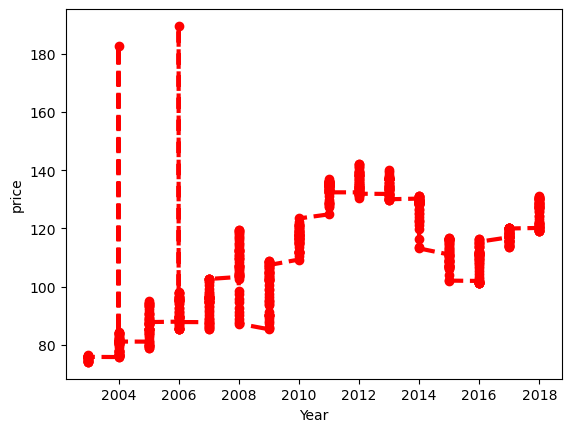

In [74]:
#plotting a graph between year and price
X=df["year"]
y=df["price"]
plt.plot(X,y,ls="dashed",marker="o",c="r",lw="3")
plt.xlabel("Year")
plt.ylabel("price")

In [75]:
#X and y are dependent and independent variable
X=df.drop(["price"],axis=1)
y=df["price"]

In [76]:
X.head()

,day,month,year
0,9,6,2003
1,16,6,2003
2,23,6,2003
3,30,6,2003
4,7,7,2003


In [77]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

### RandomForestRegressor

Split dataset into train and test set in order to prediction w.r.t X_test

If needed do scaling of data

Scaling is not done in Random forest

Import model

Fit the data

Predict w.r.t X_test

In regression check RSME Score

In [78]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(X_train, y_train)

RandomForestRegressor()

In [79]:
X_test.head()

,day,month,year
249,17,3,2008
577,30,6,2014
229,29,10,2007
292,12,1,2009
540,14,10,2013


In [80]:
y_pred = reg_rf.predict(X_test)
print(y_pred)

[106.1532 129.8139  92.7502  86.2015 134.2819 129.8883  91.8529 119.4292
 102.7823 129.3426  82.4148 100.6364 134.177  121.4535 116.7703 135.6647
 101.5591  87.6417 116.3296 134.9943  90.3861  81.3564 114.565  120.1552
  76.893   76.5016 114.9299  95.6338  95.3335 133.747  101.6608 108.9763
 108.4208 116.503  112.5535  76.0675 114.6953 128.4139  81.3202  90.7621
  80.9958 136.8689  89.2582 121.1457 113.7187  95.8861 136.4927 112.8542
 130.2829 129.1345 107.0006 111.9362 113.3791 116.2779  94.7408 133.3718
 130.2582  79.6633 137.741  129.3981 105.853  109.1728  92.5742  87.011
 117.6507  91.1654  92.6515  81.2566  84.3633  95.4675 106.5623 132.247
 122.315  121.4379  76.7006  76.5336 119.5118 110.4536 105.9401 116.0505
  95.7541 135.1634 136.671   82.9413  83.862  132.3418 133.7662 114.6888
 116.9269 106.0568  97.529  134.2395 118.5633 113.5195 120.4085 136.7928
 128.8937 136.812  129.5795  95.9457 117.4337  81.1421 120.9832 127.5753
 116.7953 133.7245  84.6043 124.7283  83.8507  94.936

C:\Users\lenovo\AppData\Local\Temp\ipykernel_308\3453123835.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-y_pred)


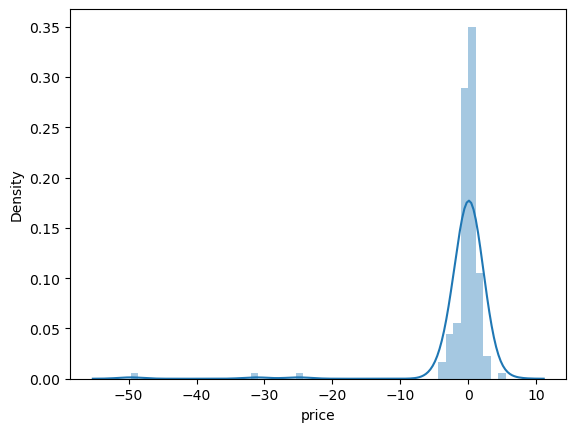

In [81]:
sns.distplot(y_test-y_pred)
plt.show()

In [82]:
from sklearn import metrics
metrics.r2_score(y_test, y_pred)

0.9249830888551029

In [83]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 1.590588343558287
MSE: 26.669498870736067
RMSE: 5.164252014642204


### Hyperparameter Tuning

1.Choose following method for hyperparameter tuning

2.RandomizedSearchCV --> Fast

3.GridSearchCV

4.Assign hyperparameters in form of dictionery

5.Fit the model

6.Check best paramters and best score

In [84]:
from sklearn.model_selection import RandomizedSearchCV

In [85]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [86]:
# Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [87]:
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = reg_rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [88]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.0s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   2.7s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   2.5s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

C:\ProgramData\anaconda2\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=300; total time=   0.7s


C:\ProgramData\anaconda2\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=300; total time=   0.6s


C:\ProgramData\anaconda2\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=300; total time=   0.6s


C:\ProgramData\anaconda2\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=300; total time=   0.6s


C:\ProgramData\anaconda2\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=300; total time=   0.6s


C:\ProgramData\anaconda2\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=   1.1s


C:\ProgramData\anaconda2\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=   1.0s


C:\ProgramData\anaconda2\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=   1.0s


C:\ProgramData\anaconda2\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=   1.0s


C:\ProgramData\anaconda2\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=   1.0s


C:\ProgramData\anaconda2\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=700; total time=   1.7s


C:\ProgramData\anaconda2\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=700; total time=   1.7s


C:\ProgramData\anaconda2\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=700; total time=   1.7s


C:\ProgramData\anaconda2\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=700; total time=   1.7s


C:\ProgramData\anaconda2\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=700; total time=   1.7s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   3.2s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   3.2s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   3.1s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   5.4s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   3.2s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=1100; total time=   2.3s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=1100; total time=   2.3s
[CV] END max_depth=5, max_feat

C:\ProgramData\anaconda2\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=700; total time=   1.8s


C:\ProgramData\anaconda2\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=700; total time=   1.8s


C:\ProgramData\anaconda2\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=700; total time=   1.8s


C:\ProgramData\anaconda2\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=700; total time=   1.8s


C:\ProgramData\anaconda2\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=700; total time=   1.9s


C:\ProgramData\anaconda2\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [89]:
rf_random.best_params_

{'n_estimators': 400,
 'min_samples_split': 5,
 'min_samples_leaf': 5,
 'max_features': 'auto',
 'max_depth': 15}

In [90]:
prediction = rf_random.predict(X_test)

In [91]:
metrics.r2_score(y_test, prediction)

0.9806338721516761

C:\Users\lenovo\AppData\Local\Temp\ipykernel_308\375150797.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-prediction)


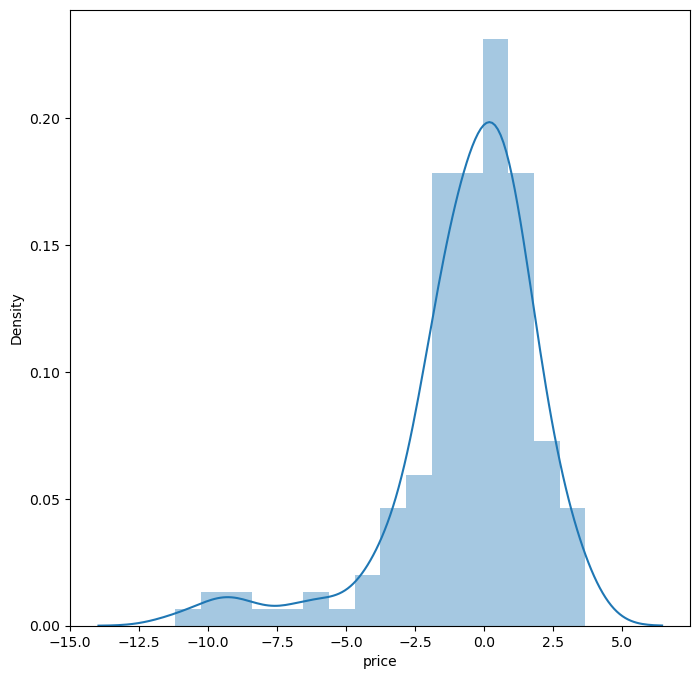

In [92]:
plt.figure(figsize = (8,8))
sns.distplot(y_test-prediction)
plt.show()

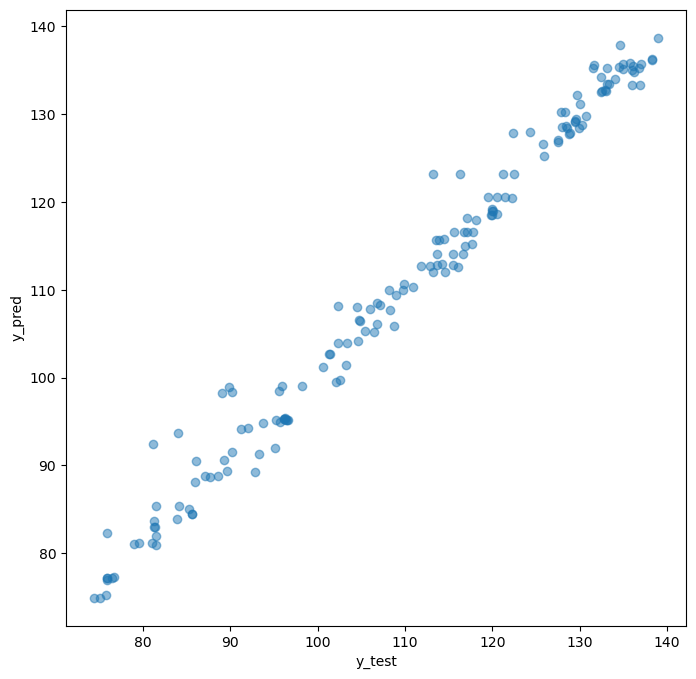

In [93]:
plt.figure(figsize = (8,8))
plt.scatter(y_test, prediction, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

### XGBoost

In [94]:
import xgboost as xgb
xgb_reg=xgb.XGBRegressor()
xgb_reg.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [95]:
y_xgbpred =xgb_reg.predict(X_test)

In [96]:
metrics.r2_score(y_test, y_xgbpred)

0.9097087420100133

### Linear Regression

In [97]:
lr=df.copy()

In [98]:
## Standardize the dataset
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [99]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [100]:
from sklearn.linear_model import LinearRegression
regression=LinearRegression()
regression.fit(X_train,y_train)


LinearRegression()

In [101]:
print(regression.coef_)

[ 0.09817756  0.80625283 13.29212165]


In [102]:
print(regression.intercept_)

110.55283950617284


In [103]:
regression.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [104]:
### Prediction With Test Data
reg_pred=regression.predict(X_test)

In [105]:
reg_pred

array([101.75435687, 120.4809691 , 100.56556543, 104.20397662,
       118.26911111, 133.01646564,  98.93384721, 121.57506803,
       105.75856869, 120.12127958,  91.21409805, 100.76844932,
       112.70521793, 133.59023945, 102.37420895, 111.92856022,
       105.57680894,  93.697319  , 109.45653967, 117.95294654,
        95.51588627,  91.29250086, 107.76754279, 107.97042668,
        89.73918545,  89.23261405, 129.42922202,  99.49642062,
        99.57482343,  91.84515053, 125.16740096, 124.28229702,
       125.96645947, 129.01225383, 127.81226198,  88.7532779 ,
       107.68913997, 110.29556535,  91.08961697,  98.64008344,
        91.13569524, 117.01820655, 104.40686051,  95.469808  ,
       123.78692602,  99.6321021 , 117.85214292, 127.39529379,
       118.471995  , 120.19968239, 106.77043483, 123.9114071 ,
       127.65545635, 128.93385102, 104.8462295 , 110.81333715,
       118.92128773,  92.50241645, 115.38012237, 120.66272885,
       106.27506383, 122.20000941,  94.33829522,  97.44

In [106]:
from sklearn.metrics import r2_score
score=r2_score(y_test,reg_pred)
print(score)

0.5408228631319314


### For Test Data Set

In [107]:
#importing the data set
test=pd.read_csv("test_data.csv")
print(test.head())

#converting it to a dtaa frame
te=pd.DataFrame(test["Date"])

#converting the data to day , month,year
te["Date"]=pd.to_datetime(train["Date"])
te["day"] = pd.to_datetime(train.Date, format="%d/%m/%Y").dt.day
te["month"] = pd.to_datetime(train.Date, format="%d/%m/%Y").dt.month
te["year"] = pd.to_datetime(train.Date, format="%d/%m/%Y").dt.year

#printing the data set
print(te.head())

#droping the date column
te.drop(["Date"],inplace=True,axis=1)

print(te.head())


       Date  Prediction
0  1/1/2019         NaN
1  1/2/2019         NaN
2  1/3/2019         NaN
3  1/4/2019         NaN
4  1/5/2019         NaN
        Date  day  month  year
0 2003-06-09    9      6  2003
1 2003-06-16   16      6  2003
2 2003-06-23   23      6  2003
3 2003-06-30   30      6  2003
4 2003-07-07    7      7  2003
   day  month  year
0    9      6  2003
1   16      6  2003
2   23      6  2003
3   30      6  2003
4    7      7  2003


In [108]:
#X and y are dependent and independent variable
X=df.drop(["price"],axis=1)
y=df["price"]

In [109]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

### Prediction for Random Forest Before Tuning

In [110]:
reg_rf.predict(te.head())

array([74.4823, 74.4769, 74.6405, 74.5049, 74.3744])

### Precdiction For RF After Tuning

In [111]:
rf_random.predict(te.head())

array([74.91222231, 74.92302215, 74.92927996, 74.92927996, 74.91640595])

### Pickling The Model file For Deployment

In [112]:
import pickle
# open a file, where you ant to store the data

# dump information to that file
pickle.dump(rf_random,open("oil_price.pkl","wb"))
